In [89]:
import pandas as pd
%matplotlib inline



In [84]:
vb = pd.read_csv('value_buy/target_list_20170521.csv',index_col=[0,1]) \
       .drop(['address','url','list'],axis=1) \
       .rename(columns = { 'ypred': 'pnl'})
    
gs = pd.read_csv('good_sell/target_list_20170521.csv',index_col=[0,1]) \
       .rename(columns = { 'ypred' : 'good_sell_prob'})
    
print("Len of value buy\t%i" % len(vb.index))
print("Len of good sell\t%i" % len(gs.index))

Len of value buy	6745
Len of good sell	9569


In [85]:
c = pd.concat([vb,gs],axis=1, join='inner')

In [86]:
len(c.index)

6745

In [87]:
c.head()

,,pnl,predicted_price,address,good_sell_prob,list,url
property_id,transaction_id,,,,,,
1180,1097308,-153544.640625,145455.359375,"3342 E Mercer Ln, Phoenix, AZ 85028",0.109159,299000,http://www.zillow.com/homedetails/3342-E-Merce...
1235,1954449,-102949.609375,107050.390625,"6216 S 44th Ave, Laveen, AZ 85339",0.109159,210000,http://www.zillow.com/homedetails/6216-S-44th-...
1265,1957932,-205154.625000,114845.375000,"2222 W Peak View Rd, Phoenix, AZ 85085",0.109159,320000,http://www.zillow.com/homedetails/2222-W-Peak-...
1432,13327375,-123015.968750,201984.031250,"15001 N 6th Ln, Phoenix, AZ 85023",0.109159,325000,https://www.zillow.com/homedetails/15001-N-6th...
1847,2990813,-119401.234375,143597.765625,"12221 S Bannock St, Phoenix, AZ 85044",0.109159,262999,http://www.zillow.com/homedetails/12221-S-Bann...


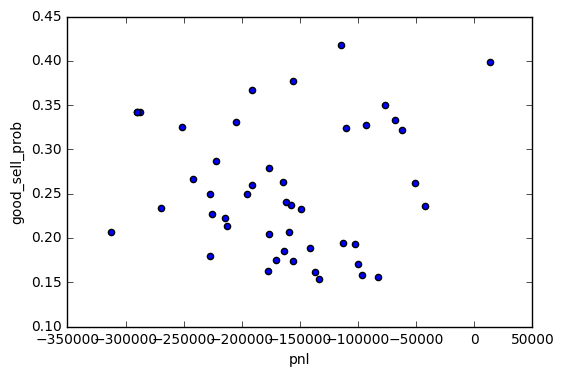

In [96]:
c.query('good_sell_prob > 0.15').plot.scatter(x='pnl', y='good_sell_prob')

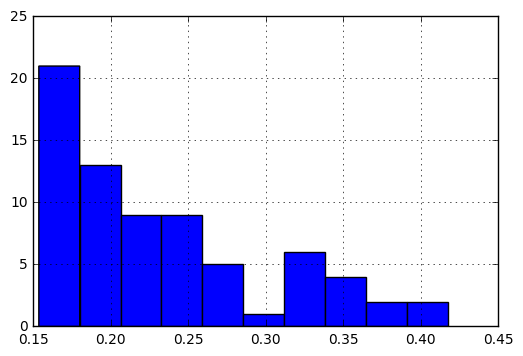

In [97]:
gs.query('good_sell_prob > 0.15').good_sell_prob.hist()

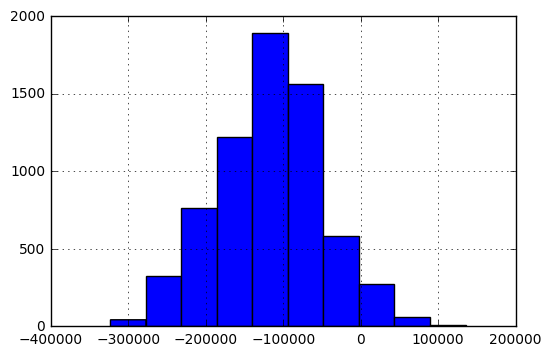

In [100]:
vb.pnl.hist()

In [107]:
c['pnl_percent'] = (c.pnl / c.list)

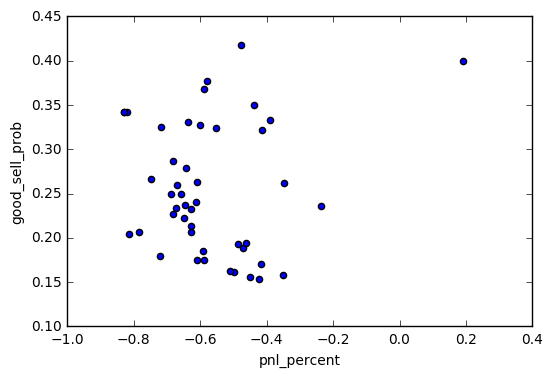

In [108]:
c.query('good_sell_prob > 0.15').plot.scatter(x='pnl_percent', y='good_sell_prob')